# <font color="darkblue"> Prática 01: Classificação binária com Redes Neurais </font>

**Objetivos:**


*   Utilizar a API Keras para classificação binária com redes neurais.

**Descrição:**

Com base em informações fornecidadas de 303 pessoas, as quais incluem idade, pressão arterial, nível de colesterol, frequência cardíaca, entre outros, crie uma rede neural para prever as chances de indivíduo ter um um infarto. Implemente as células cujos labels indicadores estão em vermelho.  

# <font color="darkblue"> Solução </font>

### Bibliotecas

In [1]:
import sys
import pandas as pd
import numpy as np
import sklearn
import matplotlib
import keras

print('Python: {}'.format(sys.version))
print('Pandas: {}'.format(pd.__version__))
print('Numpy: {}'.format(np.__version__))
print('Sklearn: {}'.format(sklearn.__version__))
print('Matplotlib: {}'.format(matplotlib.__version__))
print('Keras: {}'.format(keras.__version__))

/home/erlo/.local/lib/python3.12/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
2024-10-20 11:04:37.224961: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-20 11:04:37.254521: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-20 11:04:37.285917: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-20 11:04:37.293067: E external/local_xla/xla/stream_executor

Python: 3.12.3 (main, Sep 11 2024, 14:17:37) [GCC 13.2.0]
Pandas: 2.2.3
Numpy: 1.26.4
Sklearn: 1.5.2
Matplotlib: 3.6.3
Keras: 3.5.0


### Leitura das instâncias

In [2]:
BATCH_SIZE = 16
EPOCHS = 100
RANDOM_STATE = 2

data = pd.read_csv("heart.csv")

X = np.array(data.drop(['output'], axis=1))
y = np.array(data['output'])

In [4]:
data['output'].value_counts(normalize=True)

output
1    0.544554
0    0.455446
Name: proportion, dtype: float64

### Explorando os dados

In [3]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns

print(f"Shape: {data.shape}")
data.head()

Shape: (303, 14)


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


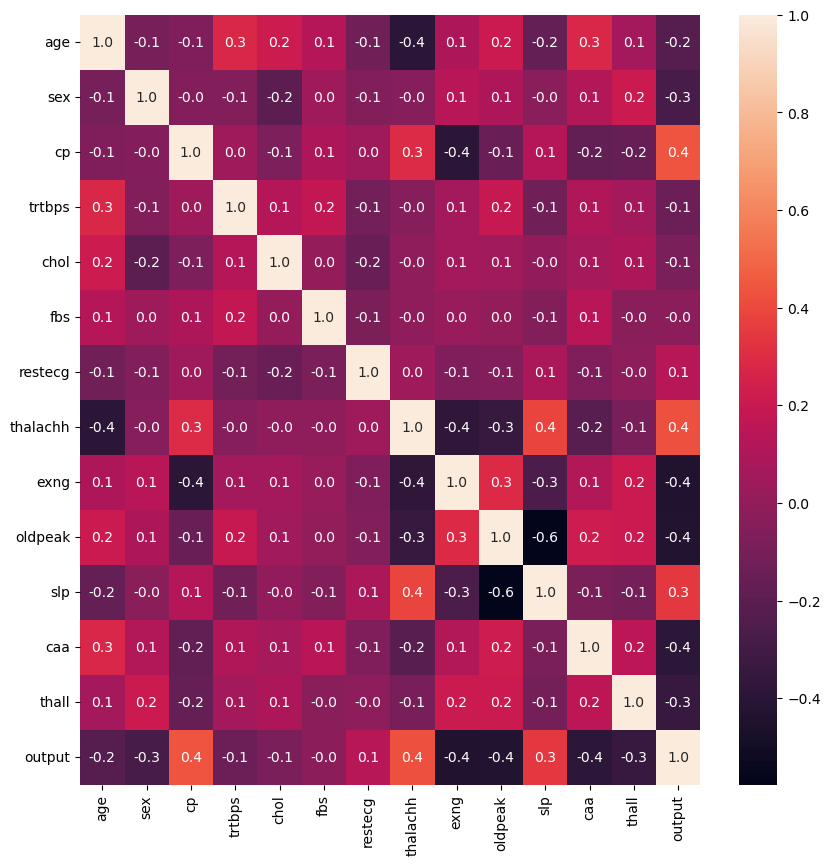

In [4]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), annot=True, fmt='.1f')
plt.show()

### Criando a rede neural

In [7]:
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from sklearn import model_selection
from keras import regularizers

# Padronização dos dados


# Normalização dos dados
min_values = X.min(axis=0)
max_values = X.max(axis=0)
X = (X - min_values) / (max_values - min_values)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, random_state=RANDOM_STATE, test_size=0.2)

# Criando a arquitetura da rede neural
model = Sequential()

# Rede configurada a partir de informações da dimensão VC e da regra de ouro

model.add(Dense(1, input_dim=13, kernel_initializer='normal', activation='relu'))
model.add(Dense(2, kernel_initializer='normal', activation='sigmoid'))
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))

# Instanciação e configuração de otimizadores
sgd = optimizers.SGD(learning_rate=0.01)

# Compilação do modelo
model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])

### Treinando a rede neural

In [8]:
history = model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE)

Epoch 1/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5622 - loss: 0.6910  
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 907us/step - accuracy: 0.5729 - loss: 0.6897
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5983 - loss: 0.6873 
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5401 - loss: 0.6908 
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5531 - loss: 0.6896 
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6132 - loss: 0.6842 
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 644us/step - accuracy: 0.5682 - loss: 0.6878
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 599us/step - accuracy: 0.5791 - loss: 0.6864
Epoch 9/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 687us/step - accuracy: 0.5746 - loss: 0.6862
Epoch 10/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 851us/step - accuracy: 0.5298 - loss: 0.6910
Epoch 11/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 761us/step - accuracy: 0.5096 - loss: 0.6934
Epoch 12/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 78

### Performance do modelo

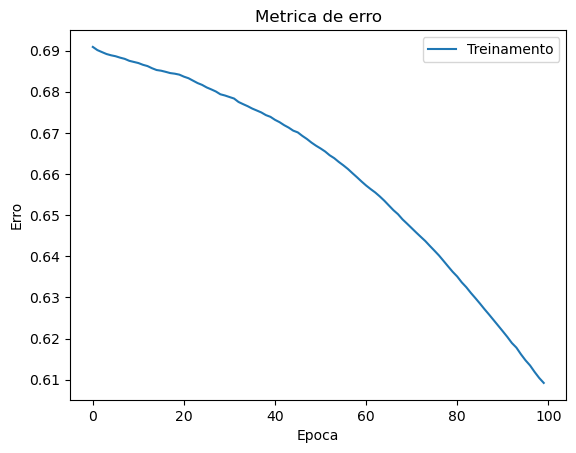

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 

--> Acuracia (treino): 0.5620
--> Acuracia (teste): 0.4754
--> E_out - E_in = 0.0226
--> acc_train - acc_test = 0.0866


In [9]:
from sklearn.metrics import accuracy_score

plt.plot(history.history['loss'])
plt.title('Metrica de erro')
plt.ylabel('Erro')
plt.xlabel('Epoca')
plt.legend(['Treinamento'])
plt.show()

# Obtendo a acuracia usando accuracy_score()
pred = np.round(model.predict(X_train))
acc_train = accuracy_score(y_train, pred)

# Obtendo a acuracia usando evaluate()
E_out, acc_test = model.evaluate(X_test, y_test, batch_size=BATCH_SIZE, verbose=0)

print(f'\n--> Acuracia (treino): {acc_train:.4f}')
print(f'--> Acuracia (teste): {acc_test:.4f}')
print(f"--> E_out - E_in = {E_out - history.history['loss'][-1]:.4f}")
print(f"--> acc_train - acc_test = {acc_train - acc_test:.4f}")

<span style="color:red; font-size: 17px; font-weight: bold;">Crie uma rede neural usando a teoria da Dimensão VC para determinar o número máximo de neurônios $n$ na camada escondida:</span>
</br></br>

<span style="color:red; font-size: 20px">
 $n \le \lfloor \frac{\lvert DS \rvert - 10}{10\times (d+2)} \rfloor  $
</span>

In [10]:
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from sklearn import model_selection


# Divida os dados em treino e teste

# Crie a arquitetura da rede neural

# Configure a rede a partir de informações da dimensão VC e da regra de ouro

# Criando a arquitetura da rede neural
model = Sequential()

# Rede configurada a partir de informações da dimensão VC e da regra de ouro

model.add(Dense(1, input_dim=13, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))

# Instanciação e configuração de otimizadores
sgd = optimizers.SGD(learning_rate=0.01)

# Compila o modelo
model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])

print(model.summary())

/home/erlo/.local/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 1)              │            14 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16 (64.00 B)

 Trainable params: 16 (64.00 B)

 Non-trainable params: 0 (0.00 B)

None


### Usando validação para verificar se há overfitting

In [11]:
X_train, X_val, y_train, y_val = model_selection.train_test_split(X_train, y_train, random_state=RANDOM_STATE, test_size=0.2)

history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=BATCH_SIZE)

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5522 - loss: 0.6924 - val_accuracy: 0.5510 - val_loss: 0.6924
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5239 - loss: 0.6924 - val_accuracy: 0.5510 - val_loss: 0.6920
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5115 - loss: 0.6920 - val_accuracy: 0.5510 - val_loss: 0.6913
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5937 - loss: 0.6896 - val_accuracy: 0.5510 - val_loss: 0.6905
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4920 - loss: 0.6924 - val_accuracy: 0.5510 - val_loss: 0.6898
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4900 - loss: 0.6923 - val_accuracy: 0.5510 - val_loss: 0.6891
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5637 - loss: 0.6878 - val_accuracy: 0.5510 - val_loss: 0.6882
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5056 - loss: 0.6904 - val_accuracy: 0.5510 - v

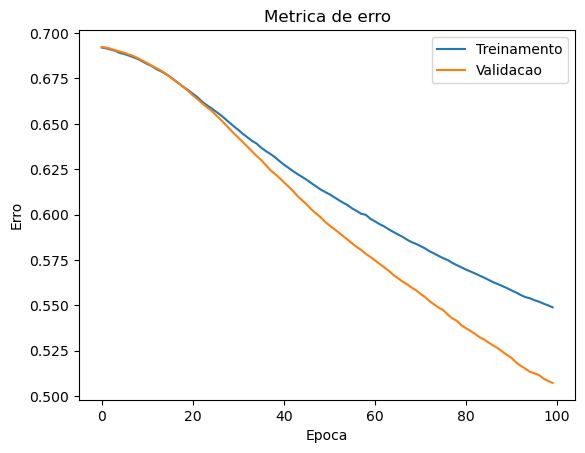

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 

--> Acuracia (treino): 0.7617
--> Acuracia (validacao): 0.7959
--> acc_train - acc_val = -0.0343
--> E_val - E_in = -0.0416


In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Metrica de erro')
plt.ylabel('Erro')
plt.xlabel('Epoca')
plt.legend(['Treinamento', 'Validacao'])
plt.show()

pred = np.round(model.predict(X_train))
acc_train = accuracy_score(y_train, pred)

pred = np.round(model.predict(X_val))
acc_val = accuracy_score(y_val, pred)

print(f'\n--> Acuracia (treino): {acc_train:.4f}')
print(f'--> Acuracia (validacao): {acc_val:.4f}')
print(f"--> acc_train - acc_val = {acc_train - acc_val:.4f}")
print(f"--> E_val - E_in = {(history.history['val_loss'][-1] - history.history['loss'][-1]):.4f}")

# BOCA DO JACARÉ: Overfitting

<span style="color:red; font-size: 18px; font-weight: bold;">Crie uma rede neural para gerar overfitting</span>

Epoch 1/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.6436 - loss: 0.6840 - val_accuracy: 0.6735 - val_loss: 0.6425
Epoch 2/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7142 - loss: 0.6388 - val_accuracy: 0.8571 - val_loss: 0.5625
Epoch 3/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7859 - loss: 0.5691 - val_accuracy: 0.9184 - val_loss: 0.4366
Epoch 4/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7693 - loss: 0.4955 - val_accuracy: 0.9184 - val_loss: 0.3522
Epoch 5/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8079 - loss: 0.4485 - val_accuracy: 0.8980 - val_loss: 0.3134
Epoch 6/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8096 - loss: 0.4193 - val_accuracy: 0.8776 - val_loss: 0.3163
Epoch 7/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7846 - loss: 0.4278 - val_accuracy: 0.8776 - val_loss: 0.3251
Epoch 8/200
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8474 - loss: 0.3947 - val_accuracy: 0.7959 - 

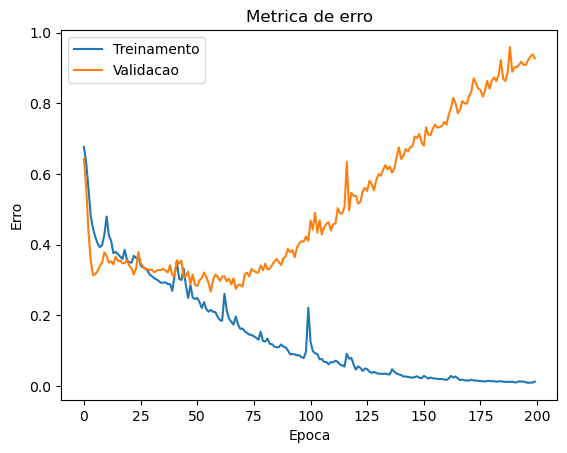

In [20]:
# Normalizacao de dados
min_values = X.min(axis=0)
max_values = X.max(axis=0)
X = (X - min_values) / (max_values - min_values)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, random_state=RANDOM_STATE, test_size=0.2)
X_train, X_val, y_train, y_val = model_selection.train_test_split(X_train, y_train, random_state=RANDOM_STATE, test_size=0.2)


# CONTINUE AQUI O RESTANTE DO CÓDIGO
# para gerar overfit, vamos aumentar o número de neurônios na camada oculta
model = Sequential()
model.add(Dense(200, input_dim=13, kernel_initializer='normal', activation='relu'))
model.add(Dense(200, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])

history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=200, batch_size=BATCH_SIZE)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Metrica de erro')
plt.ylabel('Erro')
plt.xlabel('Epoca')
plt.legend(['Treinamento', 'Validacao'])
plt.show()

### Tratando o overfitting

In [41]:
from keras.layers import Dropout
from keras import regularizers
from keras.callbacks import EarlyStopping

# Criando a arquitetura da rede neural
del model
model = Sequential()

# Após o teste anterior, testem a rede neural abaixo, treinando-a com o Early Stopping
model.add(Dense(2, input_dim=13, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.01), activation='relu'))
#model.add(Dropout(0.2))
#model.add(Dense(2, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.01), activation='relu'))
#model.add(Dropout(0.2))
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))

# Early Stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)

# Compilar o modelo
model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])

print(model.summary())

# Treinamento SEM Early Stopping
#history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=200, batch_size=BATCH_SIZE)

# Treinamento COM Early Stopping
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200, batch_size=BATCH_SIZE, callbacks=[es])


/home/erlo/.local/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_37"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_103 (Dense)               │ (None, 2)              │            28 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_104 (Dense)               │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31 (124.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4457 - loss: 0.6944 - val_accuracy: 0.4098 - val_loss: 0.6938
Epoch 2/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5034 - loss: 0.6935 - val_accuracy: 0.4754 - val_loss: 0.6938
Epoch 3/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5674 - loss: 0.6926 - val_accuracy: 0.4754 - val_loss: 0.6937
Epoch 4/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5659 - loss: 0.6922 - val_accuracy: 0.4754 - val_loss: 0.6937
Epoch 5/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5573 - loss: 0.6920 - val_accuracy: 0.4754 - val_loss: 0.6938
Epoch 6/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5420 - loss: 0.6919 - val_accuracy: 0.4754 - val_loss: 0.6937
Epoch 7/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5886 - loss: 0.6895 - val_accuracy: 0.4754 - val_loss: 0.6935
Epoch 8/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5320 - loss: 0.6905 - val_accuracy: 0.475

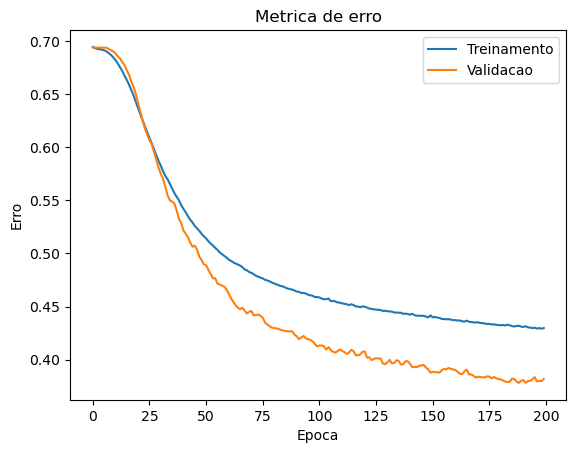

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 

--> Acuracia (treino): 0.8223
--> Acuracia (validacao): 0.8776
--> acc_train - acc_val = -0.0552
--> E_val - E_in = -0.0482


In [42]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Metrica de erro')
plt.ylabel('Erro')
plt.xlabel('Epoca')
plt.legend(['Treinamento', 'Validacao'])
plt.show()

pred = np.round(model.predict(X_train))
acc_train = accuracy_score(y_train, pred)

pred = np.round(model.predict(X_val))
acc_val = accuracy_score(y_val, pred)

print(f'\n--> Acuracia (treino): {acc_train:.4f}')
print(f'--> Acuracia (validacao): {acc_val:.4f}')
print(f"--> acc_train - acc_val = {acc_train - acc_val:.4f}")
print(f"--> E_val - E_in = {(history.history['val_loss'][-1] - history.history['loss'][-1]):.4f}")

### Usando o K-Fold Cross Validation para validar o modelo usando todo o conjunto de treinamento

/home/erlo/.local/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


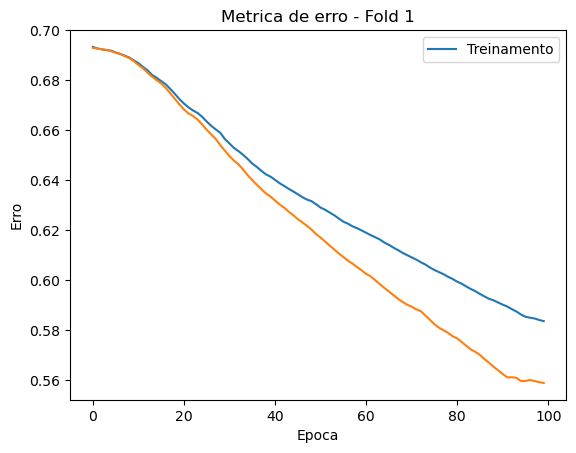

--> Acuracia (treino): 0.7824
--> Acuracia (validacao): 0.8163
--> E_val - E_in = -0.0248
--> acc_in - acc_val = -0.0339



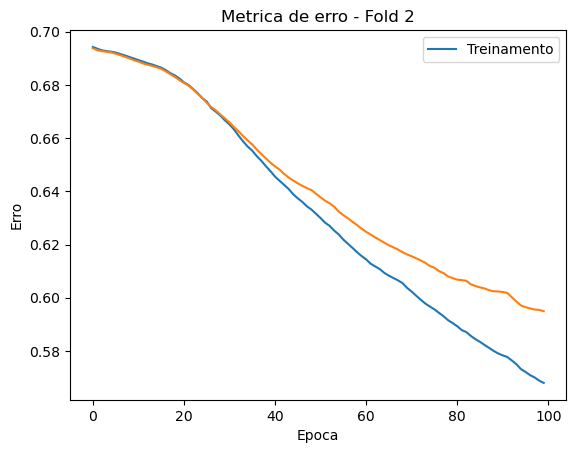

--> Acuracia (treino): 0.7720
--> Acuracia (validacao): 0.7143
--> E_val - E_in = 0.0270
--> acc_in - acc_val = 0.0577



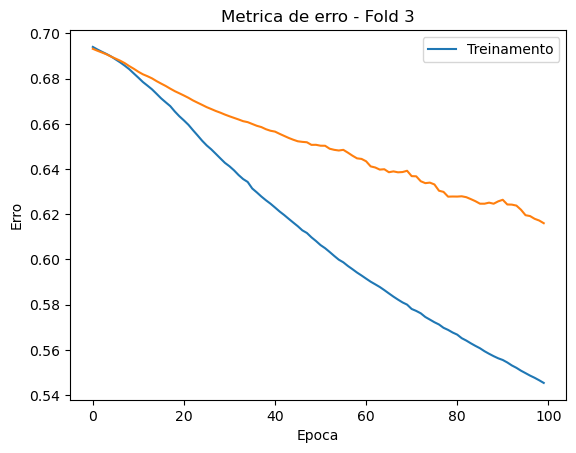

--> Acuracia (treino): 0.8144
--> Acuracia (validacao): 0.6667
--> E_val - E_in = 0.0706
--> acc_in - acc_val = 0.1478



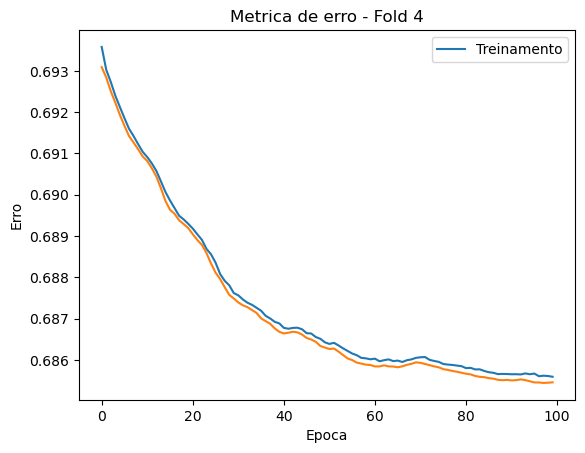

--> Acuracia (treino): 0.5619
--> Acuracia (validacao): 0.5625
--> E_val - E_in = -0.0001
--> acc_in - acc_val = -0.0006



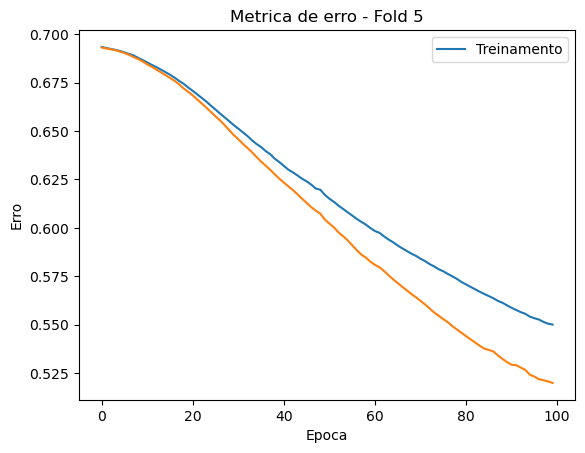

--> Acuracia (treino): 0.7835
--> Acuracia (validacao): 0.8542
--> E_val - E_in = -0.0301
--> acc_in - acc_val = -0.0707



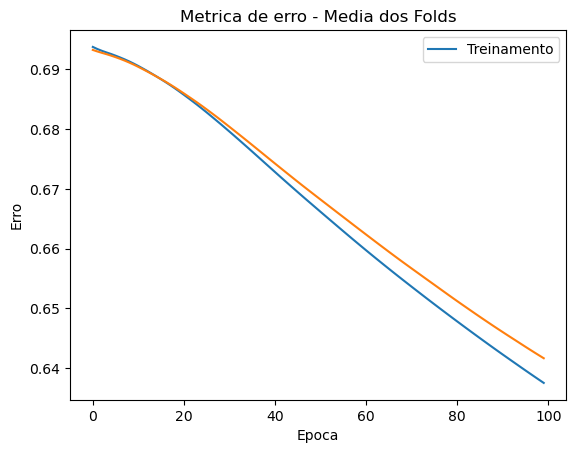

--> Acuracia (treino): 0.7428
--> Acuracia (validacao): 0.7228
--> E_val - E_in = 0.0041
--> acc_in - acc_val = -0.0707



In [43]:
from sklearn.model_selection import StratifiedKFold

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, random_state=RANDOM_STATE, test_size=0.2)

# Garante o balanceamento nos folds
skf = StratifiedKFold(n_splits=5, shuffle=True)

accuracies_train = []
accuracies_val = []
history_list = []

# Realiza o k-fold cross validation
i = 0
for train_index, val_index in skf.split(X_train, y_train):
    i = i + 1
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    # Criando a arquitetura da rede neural
    model = Sequential()
    model.add(Dense(2, input_dim=13, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.01), activation='relu'))
    #model.add(Dense(5, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.01), activation='relu'))
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))

    # Compilar o modelo
    model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])

    # Treina o modelo
    history = model.fit(X_train_fold, y_train_fold, validation_data=(X_val_fold, y_val_fold), epochs=100, batch_size=BATCH_SIZE, verbose=0)
    history_list.append(history)

    # Avalia o modelo
    _, accuracy_train = model.evaluate(X_train_fold, y_train_fold, batch_size=BATCH_SIZE, verbose=0)
    _, accuracy_val = model.evaluate(X_val_fold, y_val_fold, batch_size=BATCH_SIZE, verbose=0)
    accuracies_train.append(accuracy_train)
    accuracies_val.append(accuracy_val)

    # Exibe o historico de treinamento para um fold especifico
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(f'Metrica de erro - Fold {i}')
    plt.ylabel('Erro')
    plt.xlabel('Epoca')
    plt.legend(['Treinamento'])
    plt.show()

    print(f'--> Acuracia (treino): {accuracy_train:.4f}')
    print(f'--> Acuracia (validacao): {accuracy_val:.4f}')
    print(f"--> E_val - E_in = {(history.history['val_loss'][-1] - history.history['loss'][-1]):.4f}")
    print(f"--> acc_in - acc_val = {accuracy_train - accuracy_val:.4f}\n")

# Calcula a acuracia media
avg_accuracy_train = np.mean(accuracies_train)
avg_accuracy_val = np.mean(accuracies_val)

# Historico com valores medios dos folds
history_loss_avg = []
history_val_loss_avg = []
aux_list1 = []
aux_list2 = []

for i in range(len(history.history['loss'])):
    for j in range(len(history_list)):
        aux_list1.append(history_list[j].history['loss'][i])
        aux_list2.append(history_list[j].history['val_loss'][i])
    history_loss_avg.append(np.mean(aux_list1))
    history_val_loss_avg.append(np.mean(aux_list2))

plt.plot(history_loss_avg)
plt.plot(history_val_loss_avg)
plt.title('Metrica de erro - Media dos Folds')
plt.ylabel('Erro')
plt.xlabel('Epoca')
plt.legend(['Treinamento'])
plt.show()

print(f'--> Acuracia (treino): {avg_accuracy_train:.4f}')
print(f'--> Acuracia (validacao): {avg_accuracy_val:.4f}')
print(f"--> E_val - E_in = {(history_val_loss_avg[-1] - history_loss_avg[-1]):.4f}")
print(f"--> acc_in - acc_val = {accuracy_train - accuracy_val:.4f}\n")


In [ ]:
_, accuracy_test = model.evaluate(X_test, y_test, batch_size=BATCH_SIZE, verbose=0)
print(f'--> Acuracia (teste): {accuracy_test:.4f}')
#

--> Acuracia (teste): 0.8689
